\setcounter{secnumdepth}{0}

## Predicting Telenor stock

Written by:
- Oliver Næss Olsen
- Victor Carl Johan Rognås
- Mathias Kveldsvik Desjardins
- Henrik Bjørnstad
- Jørgen Heuch Frydenberg

## Table of Contents 

### 1. [Introduction](#introduction)
### 2. [Data Handling](#data-handling)
### 3. [Data insight and visualization](#data-insight-and-visualization)
### 4. [Basic statistics](#basic-statistics)
### 5. [Data preperation for machine learning](#data-preperation-for-machine-learning)
### 6. [Model training and analysis](#model-training-and-analysis)
### 7. [Conclusion](#conclusion)
### 8. [References](#references)
### 9. [Word Count](#word-count)

## 1. Introduction <a class="anchor" id="introduction"></a>

The idea of this project is that we want to try and predict the stock price of Telenor ASA. We are going to try to make a model that takes in several variables and uses them to make a prediction as precise as possible. Of the variables we incorporate in our model at the start of this project, we will analyze which of them make the model better and eliminate the rest.
We acknowledge that making precise predictions about Telenor’s stock price is rather far fetched, seeing that if it were this easy people all over the world would do the same,


## 2. Data Handling <a class="anchor" id="data-handling"></a>

### a. Finding appropriate dataset

Our dependent variable must obviously be Telenor ASA's stock prices over a certain amount of time, seeing as this is what we want to be able to predict. From "Yahoo! Finance" we found Telenor's monthly stock price in Norwegian kroner as of 01.31.2010 to 09.31.2022. In the Dataframe that we make later in this task we have call the Telenor's monthly stock price series for "TEL". 

To predict the stock price as best as we possibly can, we want to gather data on different variables that we believe will have a significant effect on the stock price. If the variables have a significant effect, they will help us predict the price. We have gathered a variety of different data/ variables that expand over the same timespan as our dependent variable "TEL". These independent variables are: 

        1. SP500 (which is a market-capitalization-weighted index of the 500 leading publicly traded companies in the U.S.)
        2. VIX (Is a measure of the market's expectation of volatility)
        3. BRENT_SPOT (Is the monthly pricing of crude oil)
        4. DNB ("Den Norske Bank's" monthly stock price)
        5. FDX (Fedex monthly stock price)
        6. EQNR (Equinor's monthly stock price)
        7. MOWI (Norway's biggest exporter of seafood)
        8. Monthly_KPI (The Norwegian monthly consumer price index)
        9. Policy_rate (The Norwegian monthly policy rate)
        10. TEL_PCT_Change (The monthly change in Telenor's stock price, in percent)
        11. TEL_IS_POS (Whether the monthly change in Telenor's stock price is positive or negative)

* S&P 500 is often used as standard measuring tool for market growth. Therefore, we believe it is a good indicator for general economic growth and a variable that will have correlation too our dependent variable.
* We believe the independent variable "VIX" is relevant because it tells us something about how the investors feel about the market at a certain moment in time. If the investors believe that the market is stable and safe that will encourage more investments in the stock market, and thus a higher stock price. If the investors expect a volatile market, they will be more reluctant to invest in the market.
* The reason behind why we have included the variables "BRENT_SPOT" and "MOWI" is that Telenor ASA is on the Norwegian stock exchange which is heavily influenced by oil and salmon prices. 
* DNB and Equinor are both big Norwegian companies that, just like Telenor, are partly owned by the Norwegian government. They also are all on the Norwegian stock exchange. We therefore think that their stock prices will have some correlation and make our prediction model better.
* The FedEx stock we believe to be relevant because they are a company that transports goods all over the world. This means that FedEx quite likely will feel the changes in the world economy due to the fact that less goods will be transported in bad times, and vise versa.
* We have also included the Norwegian policy rate. That's because increase in the policy rate will make investors less likely to invest and vise versa. This makes the policy rate important as to whether people will be investing in the stock market.
* We have included the monthly consumer price index because we want to see if increases or decreases in the index will influence Telenor's stock price. Will more people buy Telenor services when the index increases which then betters the stock price?
* The last two variables, "TEL_PCT_Change" and "TEL_IS_POS", are made of our dependent variable "TEL". We have coded these so that we could get one variable for the monthly change in stock price, and the other we coded into a dummy-variable that tells us if the stock price has gone up or down since the last month stock price. 

We have used different sources to gather our data, which we then have made into different variables. We used "Yahoo! Finance" to get the following variables: SP500, VIX, BRENT_SPOT, DNB, FDX, TEL, EQNR and MOWI. For "Monthly_KPI" we found our data on the website of the National Statistical Institute of Norway. The data on Policy rate we retrieved from the Sentral Bank of Norway's website. 

Yahoo! Finance is a well-known, highly regarded media institute that provides financial news and data on large number of businesses from all around the world. Seeing as Yahoo is a rather big media house, we believe that the data they provide is both accurate and trustworthy. Our two other sources, the National statistical Institute of Norway, and the Sentral Bank of Norway, are well established governmental institutions. We have no reasons not to trust the data we have retrieved from their webpages.



### b. Creating our dataset

We start of by importing the packages we need for our coding.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from pyjstat import pyjstat
import requests
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

Now we retrieve data from Yahoo! Finance. Amongst the data we find here is all the monthly stock prices we discussed above as well as the measurement of volatility ("VIX"), and the S&P500 index. The S&P500 index is the variable called "SP500". We should also note that we limit our time span by defining when we want the start of our data, and when it should end. We also see that from all the data we retrieve we save it into a data frame called "df", for now.

In [2]:
stocks = ['^GSPC', "^VIX" , 'BZ=F', 'DNB.OL',"FDX", 'TEL.OL', 'EQNR.OL', "MOWI.OL"]
f = web.DataReader(stocks, 'yahoo',start='2010-01-01',end='2022-09-30')
df = f[[("Close", s) for s in stocks]]
df.columns = df.columns.droplevel(level=0)
df.reset_index(inplace=True)

In [3]:
df.tail()

Symbols,Date,^GSPC,^VIX,BZ=F,DNB.OL,FDX,TEL.OL,EQNR.OL,MOWI.OL
3285,2022-09-26,3655.040039,32.259998,84.059998,176.000000,142.899994,103.449997,344.450012,173.449997
3286,2022-09-27,3647.290039,32.599998,86.269997,177.000000,144.949997,106.550003,352.799988,170.050003
3287,2022-09-28,3719.040039,30.180000,89.320000,174.449997,149.990005,104.400002,353.799988,137.899994
3288,2022-09-29,3640.469971,31.840000,88.489998,169.300003,152.309998,101.500000,348.950012,133.550003
3289,2022-09-30,3585.620117,31.620001,87.959999,172.850006,148.470001,99.660004,358.100006,138.500000


In the table right above, we have printed the last 5 rows in the data frame "df". We should here note that the data is shown day by day, and that the last row is dated to 30.09.2022. We see this under the column called "Date".

The underlying code transforms our data from daily changes into monthly changes. Also, we rename our dataframe from "df" to "stocksmonthly". 

In [4]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
stocksmonthly = df.resample('1M').mean()

Then we rename our column names so that they are easier to both interpret and to use in our later coding. Names that for example use "dot", can become points of error when coding. Therefore, we minimize possible errors by changing the names.

In [5]:
stocksmonthly.rename(columns={"DNB.OL" : "DNB"}, inplace=True)
stocksmonthly.rename(columns={"MOWI.OL" : "MOWI"}, inplace=True)
stocksmonthly.rename(columns={"TEL.OL" : "TEL"}, inplace=True)
stocksmonthly.rename(columns={"EQNR.OL" : "EQNR"}, inplace=True)
stocksmonthly.rename(columns={"^GSPC" : "SP500"}, inplace=True)
stocksmonthly.rename(columns={"^VIX" : "VIX"}, inplace=True)
stocksmonthly.rename(columns={"BZ=F" : "BRENT_SPOT"}, inplace=True)

In [6]:
stocksmonthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2010-01-31 to 2022-09-30
Freq: M
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SP500       153 non-null    float64
 1   VIX         153 non-null    float64
 2   BRENT_SPOT  153 non-null    float64
 3   DNB         152 non-null    float64
 4   FDX         153 non-null    float64
 5   TEL         153 non-null    float64
 6   EQNR        153 non-null    float64
 7   MOWI        153 non-null    float64
dtypes: float64(8)
memory usage: 10.8 KB


We notice in the infochart that our DNB variable is incomplete. We will address this by filling it with the mean of the month prior, and the month after, ensuring a not to unrealsitic estimate.

In [7]:
stocksmonthly["DNB"] = (stocksmonthly["DNB"].ffill()+stocksmonthly["DNB"].bfill())/2

Now we gather the data from National statistical institute of Norway. The coding that we use to fetch this data we found on the National statistical institute's website. When one finds data on their websites the institute have also written how to fetch their data onto different platforms. This made it easy for us to retrieve the data and use it for our model.  

In [8]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/05327/'

In [9]:
payload = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": [
          "JA_TOTAL"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KPIJustIndMnd"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2010M01",
          "2010M02",
          "2010M03",
          "2010M04",
          "2010M05",
          "2010M06",
          "2010M07",
          "2010M08",
          "2010M09",
          "2010M10",
          "2010M11",
          "2010M12",
          "2011M01",
          "2011M02",
          "2011M03",
          "2011M04",
          "2011M05",
          "2011M06",
          "2011M07",
          "2011M08",
          "2011M09",
          "2011M10",
          "2011M11",
          "2011M12",
          "2012M01",
          "2012M02",
          "2012M03",
          "2012M04",
          "2012M05",
          "2012M06",
          "2012M07",
          "2012M08",
          "2012M09",
          "2012M10",
          "2012M11",
          "2012M12",
          "2013M01",
          "2013M02",
          "2013M03",
          "2013M04",
          "2013M05",
          "2013M06",
          "2013M07",
          "2013M08",
          "2013M09",
          "2013M10",
          "2013M11",
          "2013M12",
          "2014M01",
          "2014M02",
          "2014M03",
          "2014M04",
          "2014M05",
          "2014M06",
          "2014M07",
          "2014M08",
          "2014M09",
          "2014M10",
          "2014M11",
          "2014M12",
          "2015M01",
          "2015M02",
          "2015M03",
          "2015M04",
          "2015M05",
          "2015M06",
          "2015M07",
          "2015M08",
          "2015M09",
          "2015M10",
          "2015M11",
          "2015M12",
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [10]:
result = requests.post(POST_URL, json = payload)

In [11]:
dataset = pyjstat.Dataset.read(result.text)
KPI_JA = dataset.write('dataframe')

We have now retrieved data on Norway's monthly consumer price index and assigned it to the variable "KPI_JA. Note, that we have used "KPI-JA" which also includes energy prices, while there also exists something called KPI-JAE which does not include energy prices. It is noteworthy seeing that general energy prices have skyrocketed that last year or two. 

In the next coding bracket, we insert our newly fetched data into our data frame "Stocksmonthly".

In [12]:
stocksmonthly["Monthly_KPI"] = KPI_JA["value"].values

Now we retrieve data about the Norwegian policy rate from the Sentral Bank of Norway's website and print the 5 first rows to show the data.

In [13]:
rate = pd.read_csv("https://data.norges-bank.no/api/data/IR/M.KPRA.SD.R?apisrc=qb&format=csv&startPeriod=2010-01-01&endPeriod=2022-09-01&locale=no&bom=include", sep=";", decimal=",")

In [14]:
rate.head()

,FREQ,Frekvens,INSTRUMENT_TYPE,Instrumenttype,TENOR,Løpetid,UNIT_MEASURE,Måleenhet,DECIMALS,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE,CALC_METHOD,Calculation Method
0,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-01,1.75,NaN,NaN
1,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-02,1.75,NaN,NaN
2,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-03,1.75,NaN,NaN
3,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-04,1.75,NaN,NaN
4,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-05,1.96,NaN,NaN


The data we want to add into our data frame is the column called "OBS_VALUE". This column shows the monthly policy rate in Norway taken from the Oslo stock exchange. In the coding bracket bellow we add this column to our dataframe "stocksmonthly".

In [15]:
stocksmonthly["Policy_Rate"] = rate["OBS_VALUE"].values

For our last two variables we use the information we already have on Telenor's stock price and turn it into two different sets of data. First, we make a series of monthly percentage change in stock price, and then we make a dummy-variable which shows if the stock price has increased or decreased. For the dummy variable "1"= increase and "0"= decrease, in stock price from last month’s price.

In [16]:
stocksmonthly["TEL_PCT_Change"] = stocksmonthly["TEL"].pct_change()*100

In [17]:
stocksmonthly["TEL_IS_POS"] = np.where(stocksmonthly.TEL_PCT_Change>0, 1, 0)

In [18]:
stocksmonthly.head()

Symbols,SP500,VIX,BRENT_SPOT,DNB,FDX,TEL,EQNR,MOWI,Monthly_KPI,Policy_Rate,TEL_PCT_Change,TEL_IS_POS
Date,,,,,,,,,,,,
2010-01-31,1123.581582,20.643158,77.008421,66.472499,83.260000,79.355000,142.719999,46.971000,91.1,1.75,NaN,0
2010-02-28,1089.159989,22.540000,74.909999,64.467500,80.504211,75.627500,132.040000,52.585000,92.4,1.75,-4.697247,0
2010-03-31,1152.048690,17.767391,79.931304,67.847826,88.973478,79.454348,136.443479,51.529565,92.8,1.75,5.060128,1
2010-04-30,1197.316185,17.424286,85.753810,68.315789,91.950001,84.192105,144.047369,54.081579,93.0,1.75,5.962867,1
2010-05-31,1125.062006,31.929500,76.664737,65.055555,85.434000,80.877778,134.416667,54.419445,92.5,1.96,-3.936624,0


Now we have our complete data frame which we are going to be using throughout our assignment. Above we see the first five rows of the data frame showcasing all our independent variables as well as "Tel" which as we know is going to be our dependent variable.

Lastly, we have transformed our dataset into a csv-file to have a saved version for later use.

In [19]:
stocksmonthly.to_csv("stocksmonthly_csv.csv")

## 3. Data insight and visualization <a class="anchor" id="data-insight-and-visualization"></a>

Here we wish to visualize the data so that we can get a better look at it. This might help us discover some weaknesses in our dataset so that we may take this into account for later analysis.

### Graph

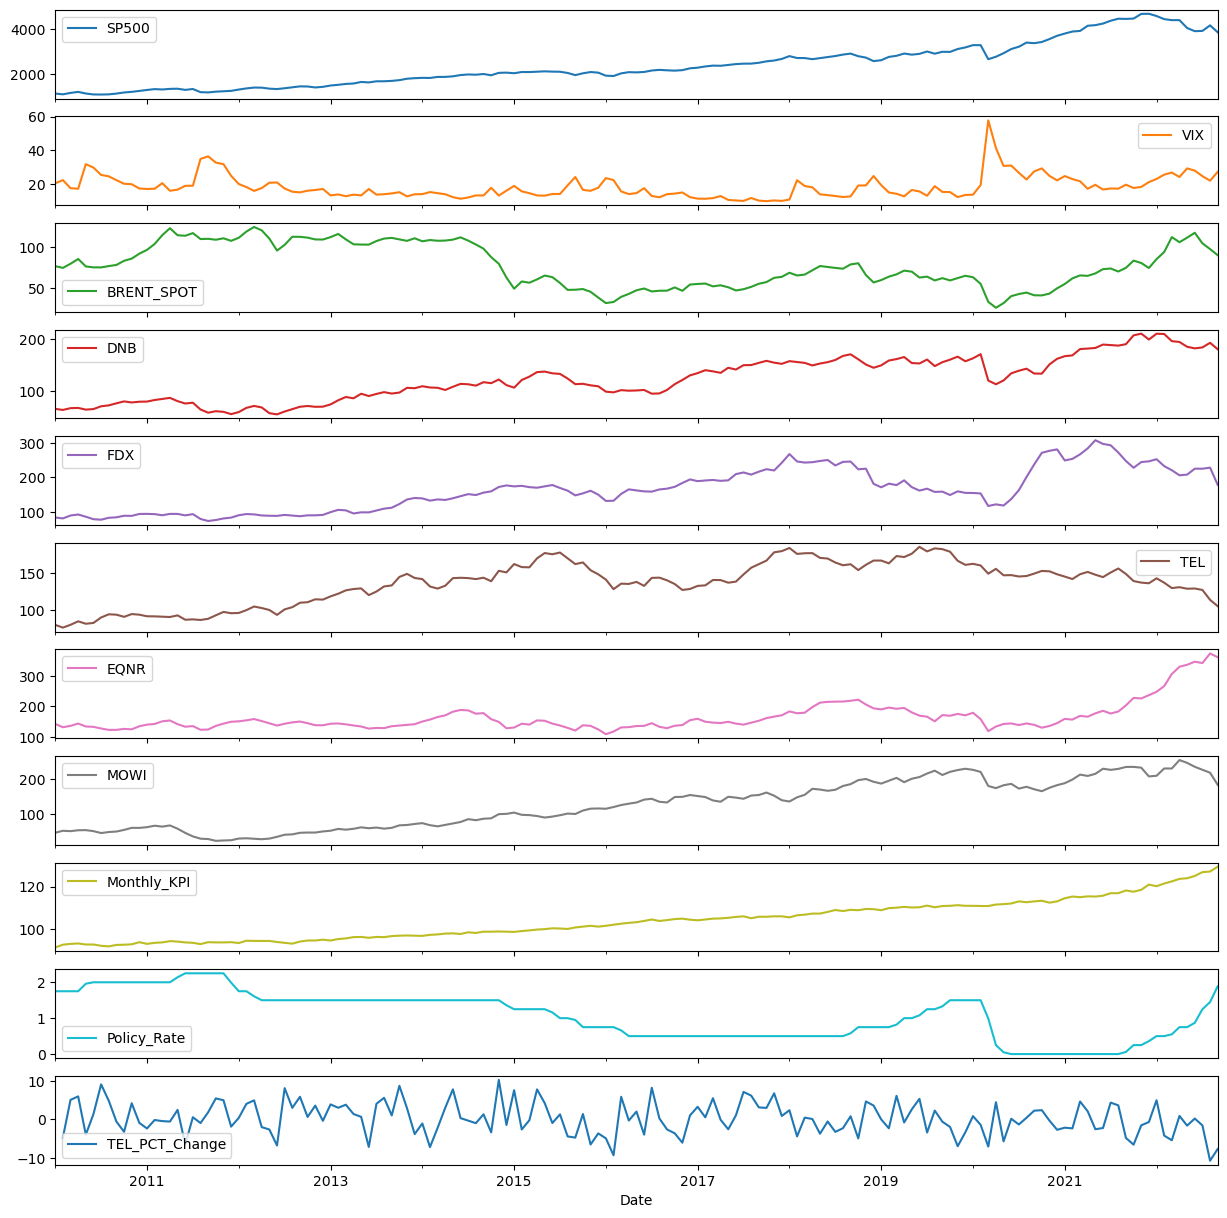

In [20]:
stocksmonthly.drop("TEL_IS_POS", axis=1).plot(subplots = True, figsize=(15,15))
plt.show()

Here we can see the variation of our variables over the duration we want to explore. For the stockprices this shows us the growth the stockprice has had over the last 10 year period. Note that the scale of the y-values are different on the graph witch can make it difficult to gauge the differences of the magnitude of growth relative to the other variables. It does however give an insight to the change in relation to its size. Some take aways:

- We can see that for almost all our variables there was a big swing at the start of the year 2020. This is most likly due to the global Covid-19 pandemic hitting the economy. We can see that as the stockprices drop during this period the VIX that mesures insecurity rises to an all time high. This is logical due to the fact that investors get nervous when all the stocks ceash at once. What this means for us is that there is a strong negative correlation between the Vix and the stocks witch is promising in regards of using it as a indicator in our model.
- Sadly the Telenor stock as opposed to the others did not experience the growth in the period after the little crash that the other stocks did. We can also se that the norwegian stocks DNB, Mowi and Telenor experienced similar growth for the period 2011 to 2015. This is more visible in the figure underneath as it shows that the graphs on top where you can se that they do not cross over eachother during this period.
- We also note that all the data looks to be complete.

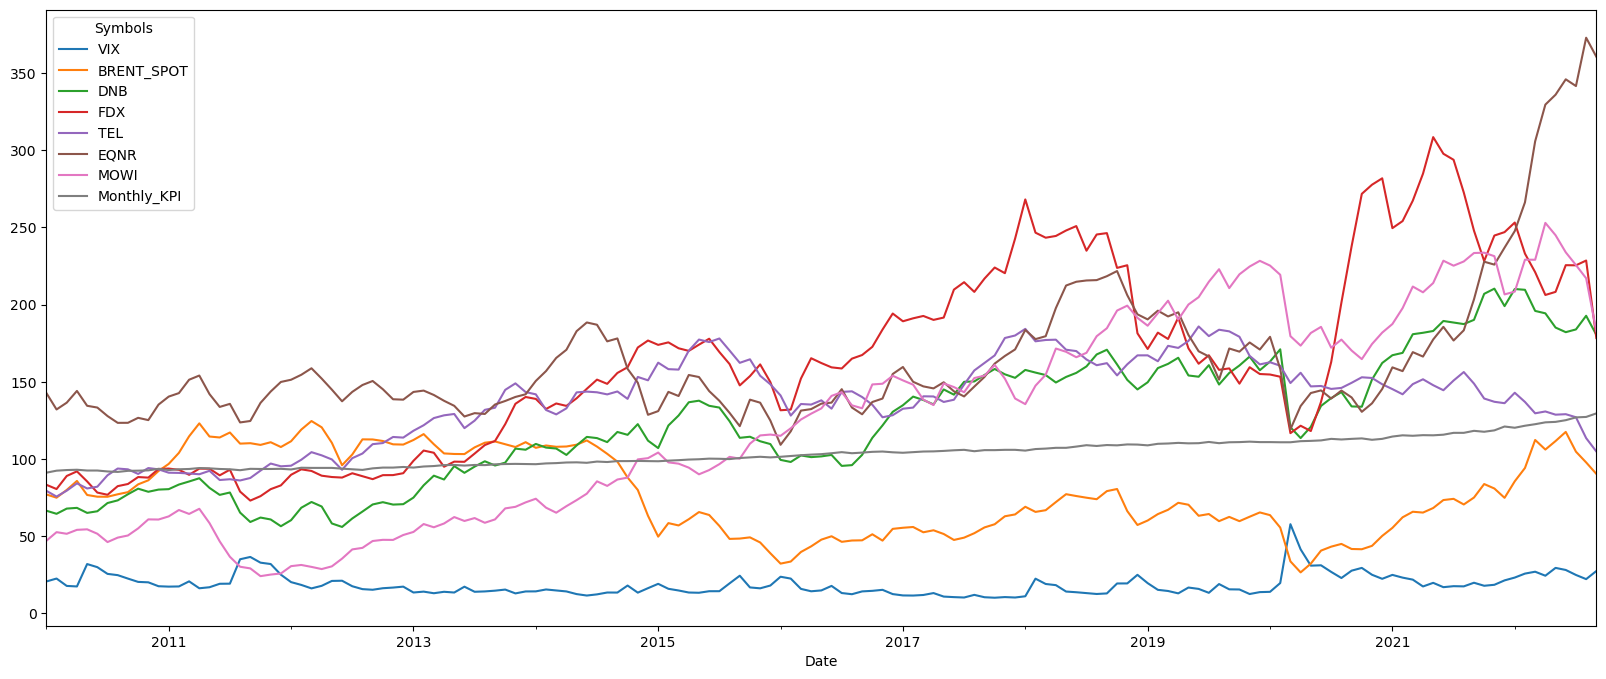

<Figure size 640x480 with 0 Axes>

In [21]:
stocksmonthly.drop(["SP500", "TEL_IS_POS", "TEL_PCT_Change", "Policy_Rate"], axis=1).plot(figsize=(20,8))

plt.figure()
plt.show()

In this diagram we see more clearly how the stock prices have changed compared to each other over the course of the last 10 years.

### Histogram

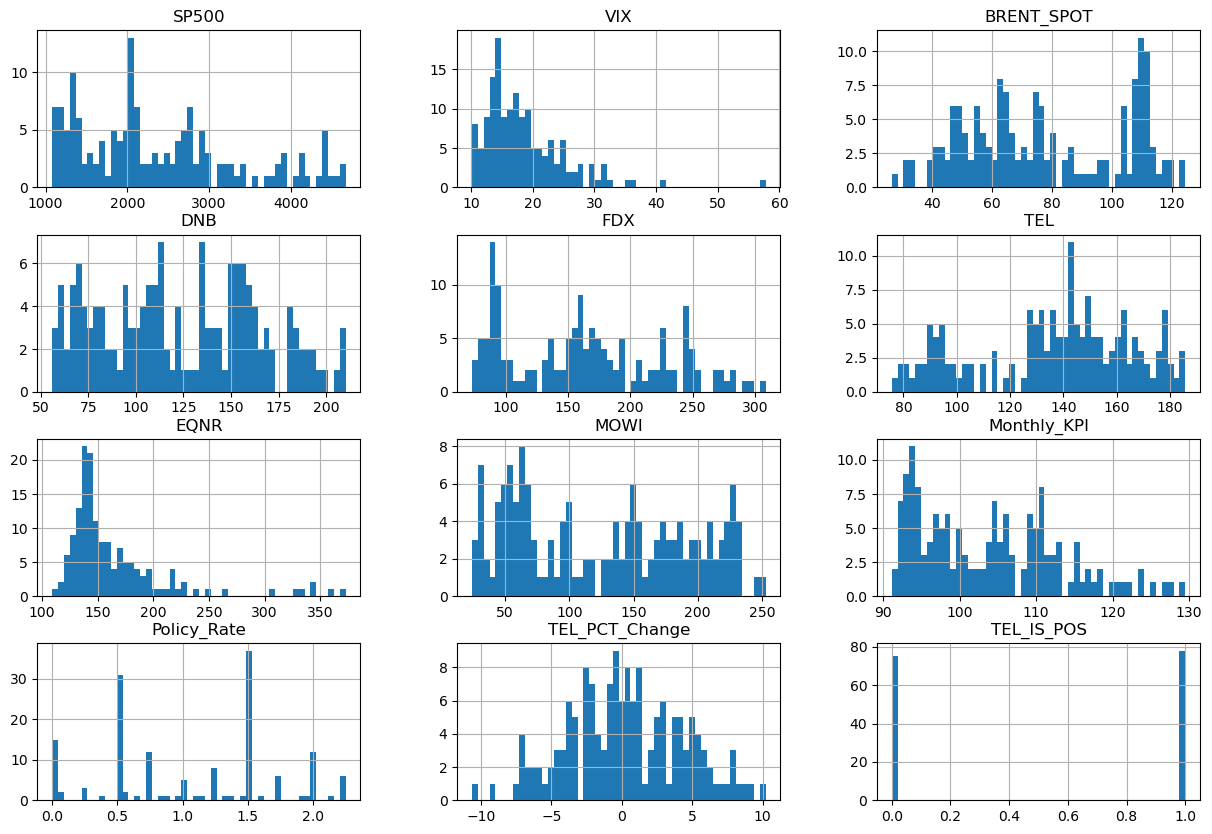

In [22]:
stocksmonthly.hist(bins=50, figsize=(15,10))
plt.show()

We se that TEL_IS_POS is a binary vaiable. It shows us that Telenor has had more months with growth than without growth. The stock variables FDX, EQNR, TEL, MOWI all range within simular variable ranges mostly between 50-250. We see that there are no normal distributions among the stocks. The VIX indexs aswell as the EQNR stock have a long tailed distribution witch indicates that there might be outliars. TEL_PCT_Change is the procentage change in price for the TEL stock. It is closer to normaly distributed centered around 0. This makes sense seeing as the TEL_IS_POS shows us that the number of times it goes negative is almost as big as the number its positive.

### Joint distribution

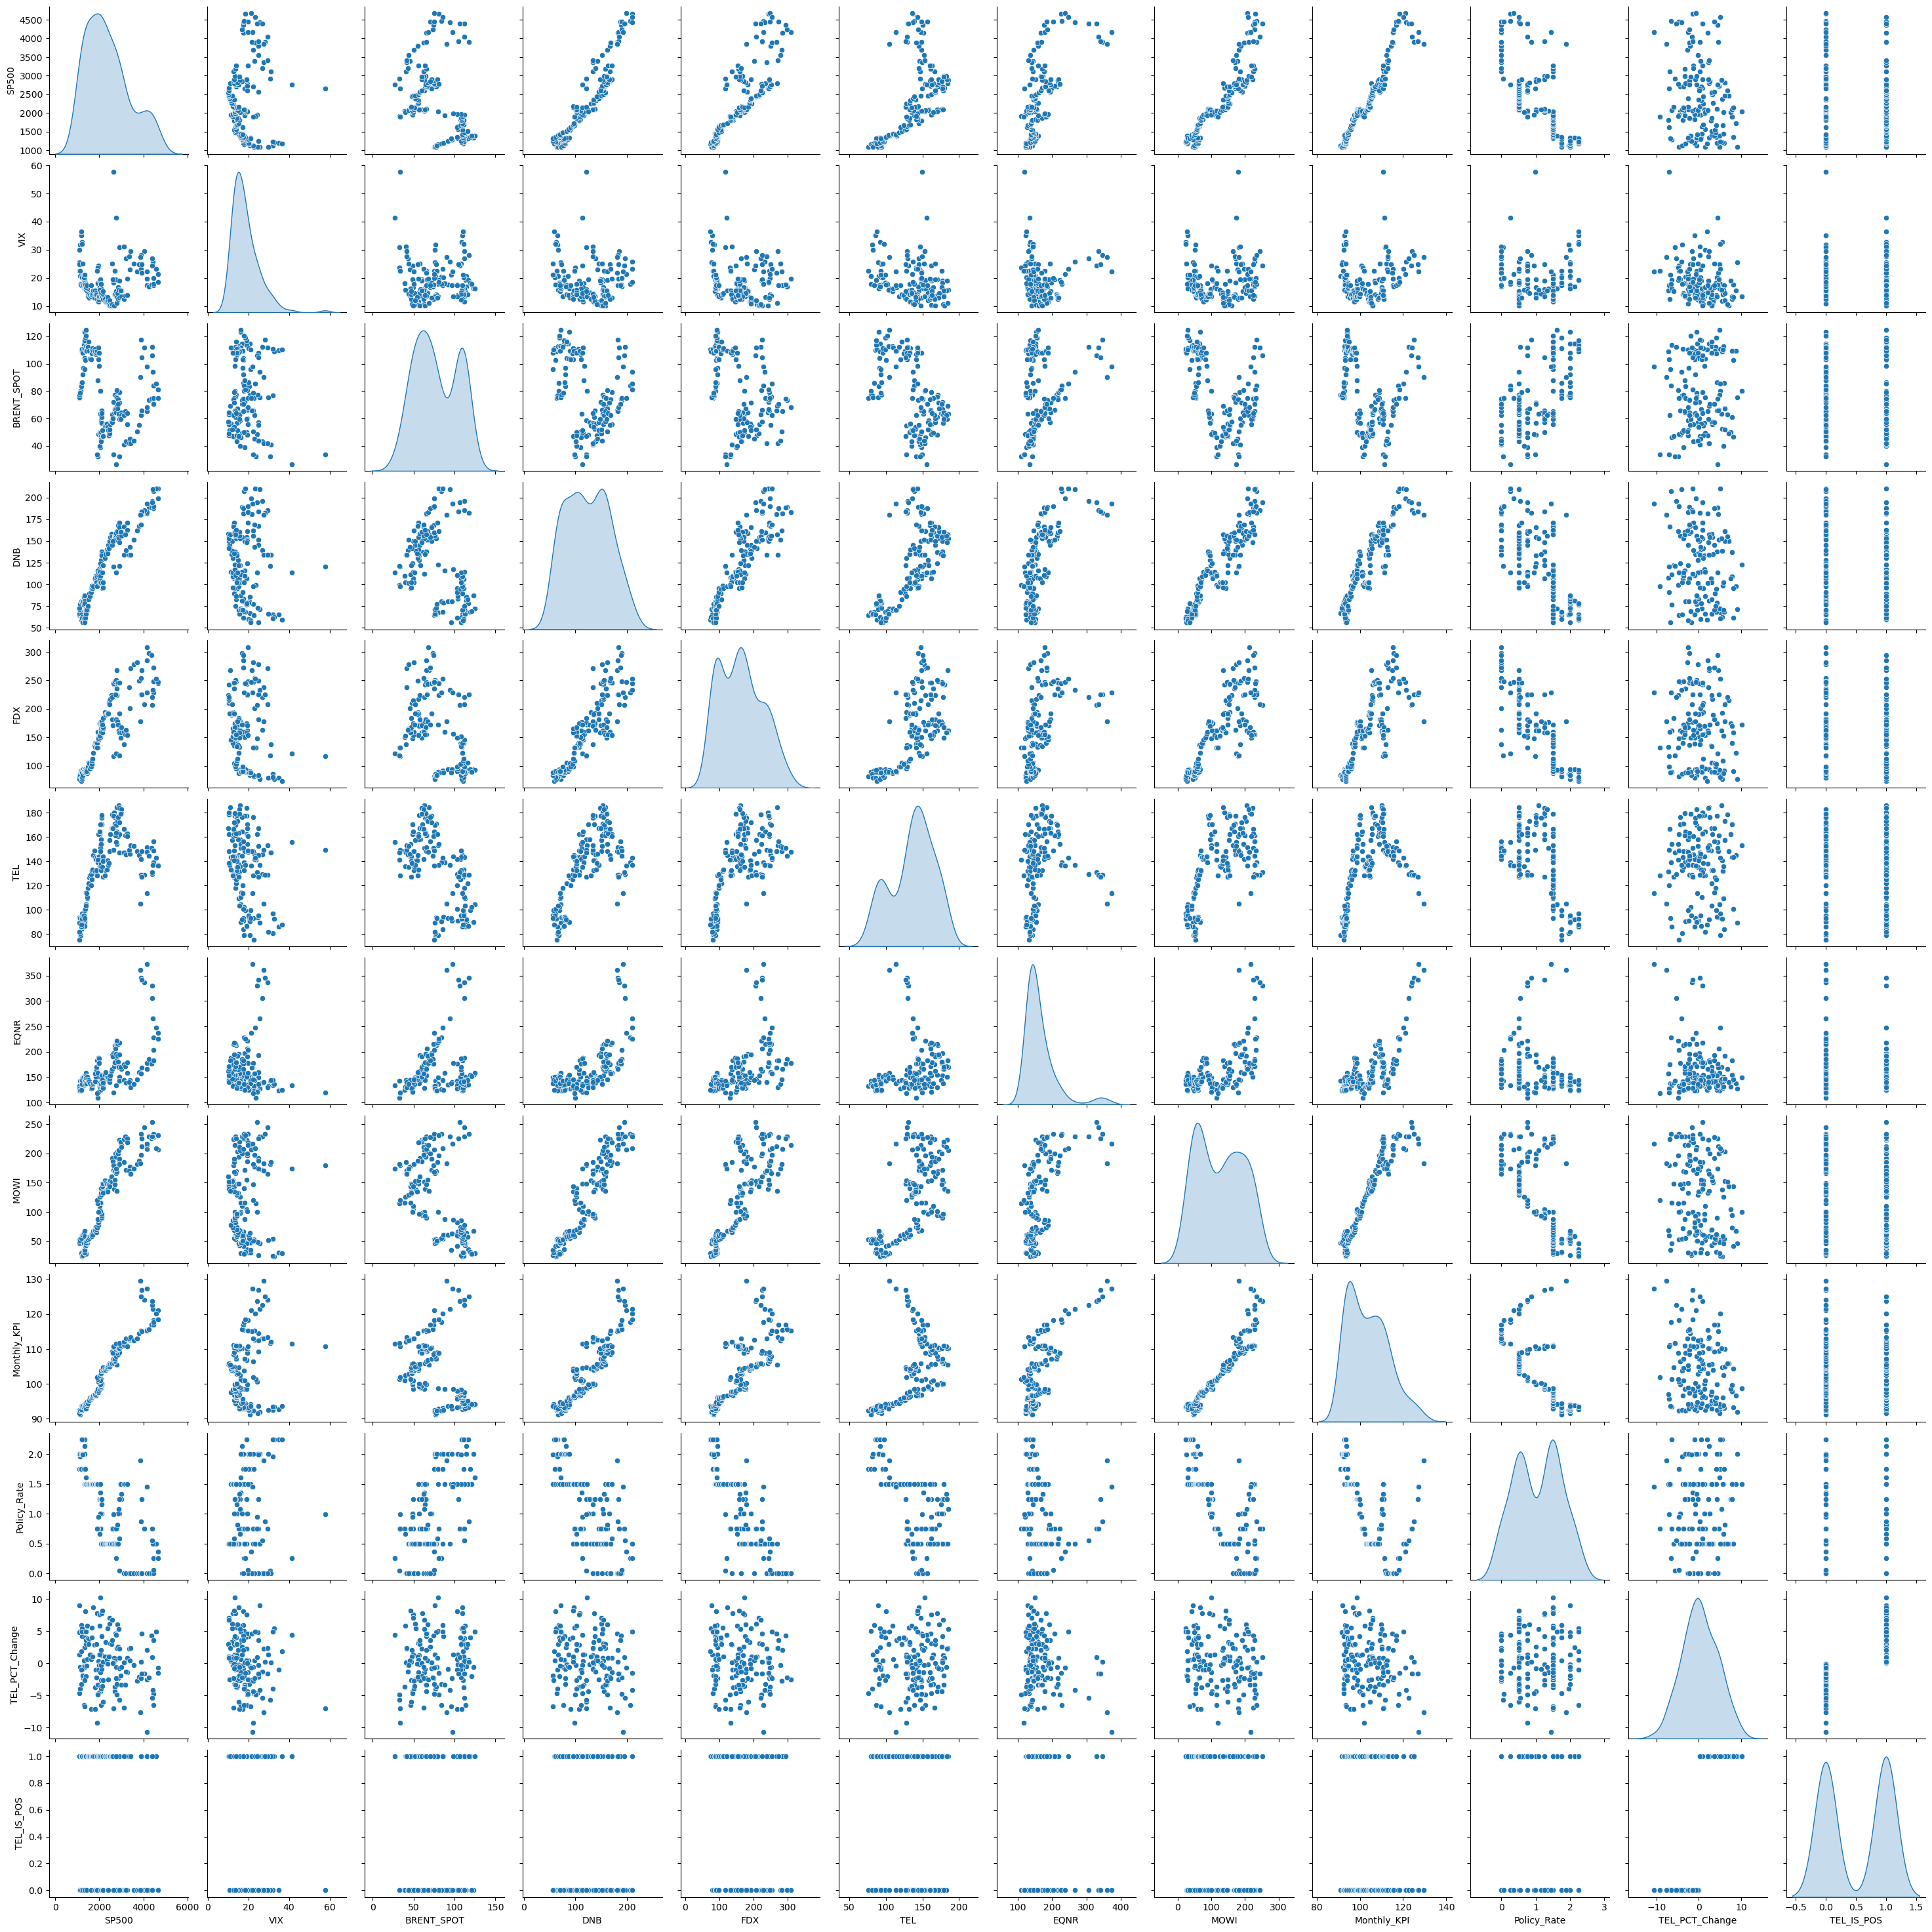

In [23]:
sns.pairplot(stocksmonthly, diag_kind='kde')
plt.show()

In the diagonal row of the pariplot we can se the distributions of the variables as a smoother curve. This allows us to tell that the TEL_PCT_Change is close to normally distributed centered around 0 as we mentioned above.
- We can also see that the variables that have a low number of different values such as the Policy_rate and the TEL_IS_POS(witch literally only has 2 possible values) precents as bimodal distributions where the data arecentered around 2 distinct peeks. This can also be said for the MOWI and BRENT_SPOT aswell even tho they have a wider range of values.
- The EQNR and VIX are both skewed to the left and displaying what are possible outliars in the higher range of values.

Looking at the bivariate plots we see that the plots of Policy_Rate and TEL_IS_POS have these horrisontal lines going across the scatterplots. This is becausse these two variables only have values for given intervals for the policy rate we see that it is usually inside a 0.25 intervall although there are some exceptions this is the norm.

For the other bivaritae plots we want to look for what variables may correlate the best with our focal point witch is the TEL stock but aslo with the other variables. Because correlation between our independet variabels could be multicolinarity issues for our analisis

- TEL seems to correlate the best with the FDX and DNB variable showing a upwards trajectory that widens towards the top. The SP500 shares the same cluster as TEL aswell. But it looks like it diverges for the bigger values of the SP500.
- For the independent variables SP500 and the KPI have a great deal of correlation, one might theorise that they both follow the greneral growth or inflation in the market. MOWI and KPI have a correlation with very little variance.

The fact that we have independant variables that covariate means that there are patterns in the dataset that might be caused by factors outside of the dataset itself. This could be a problem for our model later.

### Boxplots

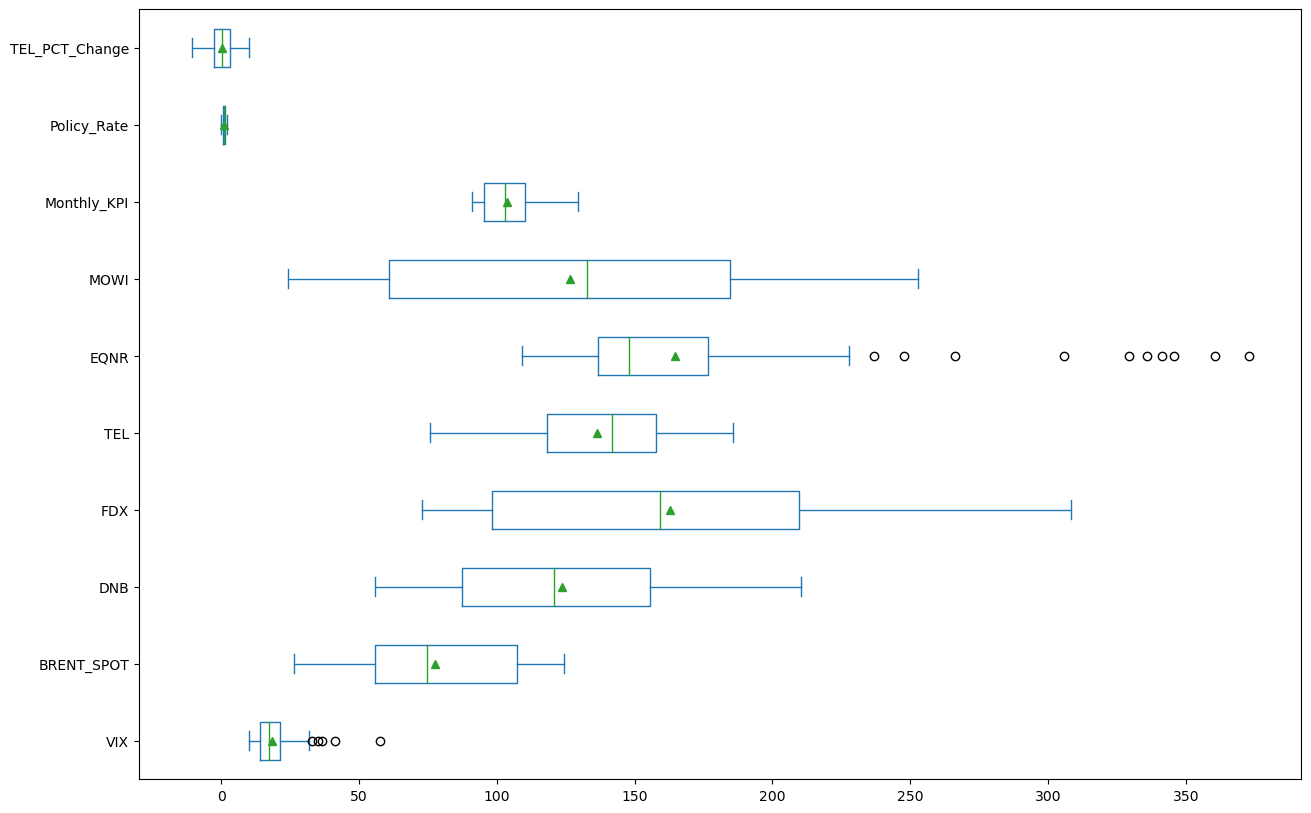

In [24]:
stocksmonthly.drop(["SP500", "TEL_IS_POS"], axis=1).plot.box(figsize=(15, 10), vert=False, showmeans=True)

plt.show()

The Whisker Boxplot confirmes that there are indeed outliars for Equinor and Vix values as we can see the dots to the right of the "max score"

## 4. Basic statistics <a class="anchor" id="basic-statistics"></a>

### Overview of our data

In [25]:
stocksmonthly.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
SP500,153.0,2371.991998,978.266489,1079.803336,1550.828986,2099.283658,2897.450451,4674.772772
VIX,153.0,18.569924,6.725341,10.125455,13.974546,17.271500,21.354546,57.736818
BRENT_SPOT,153.0,77.717657,25.975428,26.537143,55.926843,74.807727,107.199500,124.544546
DNB,153.0,123.743118,41.561353,55.969048,87.497222,120.800000,155.723809,210.277274
FDX,153.0,162.975446,61.564268,73.024286,98.257727,159.393478,209.647726,308.411497
TEL,153.0,136.450683,28.809100,75.627500,118.245455,141.800001,157.854547,185.800001
EQNR,153.0,164.720067,48.155173,109.150000,136.871428,147.882609,176.690910,372.776090
MOWI,153.0,126.447722,67.033172,24.095238,60.861363,132.726318,184.640001,252.866670
Monthly_KPI,153.0,103.745752,9.230620,91.100000,95.400000,103.100000,110.400000,129.500000


To get an overview of our data, we use the descirbe() function and then transpose the datavframe to improve its readability. Taking a quick look at the table above, we can see that TEL_PCT_Change has one value less than the other variables. This is because it shows the percentage change in Telenor's stock price. Seeing as we need a previous value to calculate change, it isn't possible to calculate a change for Telenor's first stock price, and therefore the first value will be missing. 
Furthermore, from TEL_IS_POS, we can see that Telenor's stock price has on average had an increase in value 51% of the times its value has changed. We can also observe that its value has increased 0,27% on average from 2010 to 2022, with a low of -10,64% and a high of 10,21%. 
Looking at the mean and median of the stocks we included, we can see that most of the stocks have a larger mean than median (except MOWI and TEL). This means that most of the distributions will be skewed to the right.

### Mean and medain

To visualize our data more easily, we will change the data frame of the stocks into percentage change, which will then show returns.

Symbols,SP500,VIX,BRENT_SPOT,DNB,FDX,TEL,EQNR,MOWI
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.008718,0.023615,0.005057,0.008395,0.007437,0.002677,0.007967,0.011325
std,0.033564,0.250996,0.087314,0.058987,0.069185,0.041216,0.060565,0.067854
min,-0.190681,-0.311259,-0.394081,-0.295165,-0.238440,-0.106420,-0.247221,-0.214036
25%,-0.004114,-0.105169,-0.043430,-0.022957,-0.023398,-0.025278,-0.032424,-0.026672
50%,0.014026,-0.014043,0.013509,0.012202,0.009205,0.001480,0.012121,0.022352
75%,0.029286,0.085723,0.059702,0.048640,0.042087,0.031534,0.045351,0.049032
max,0.063383,1.941412,0.262058,0.136659,0.236118,0.102127,0.148639,0.184102


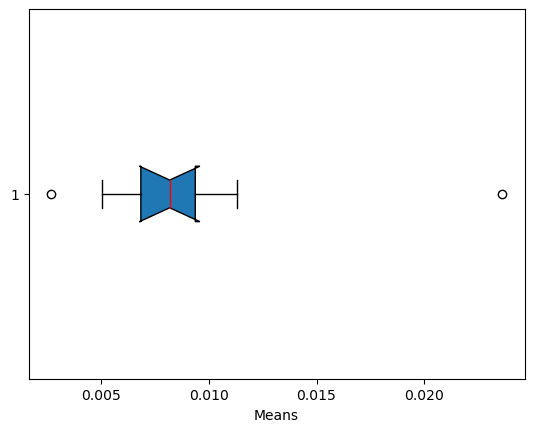

In [26]:
stock_returns=stocksmonthly.drop(["Monthly_KPI","Policy_Rate","TEL_PCT_Change","TEL_IS_POS"], axis=1).pct_change().describe()

plt.boxplot(stock_returns.iloc[1],notch = True, patch_artist = True, vert = False, medianprops = dict(color = "red"))
plt.xlabel("Means")

stock_returns

First, we use a boxplot to visualize the means of the different stocks, because we believe this to be the best way of visualizing our data. From this boxplot we can see that the means range from approximately 0,002 to 0,024 and has a median of around 0,08. Furthermore, we can see that the quantiles range from 0,006 to 0,009.

### Standard deviation

Text(0.5, 0, 'Standard deviations')

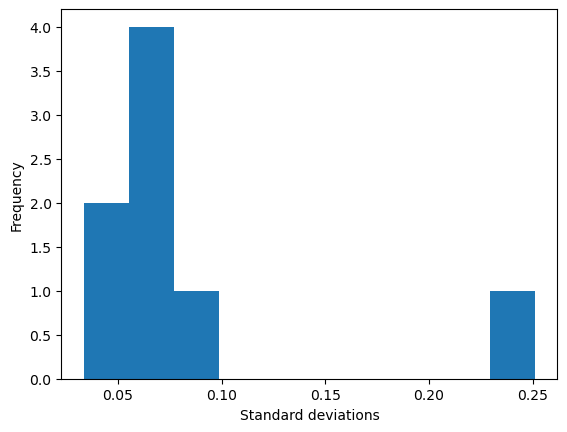

In [27]:
stock_returns.iloc[2].plot.hist()
plt.xlabel("Standard deviations")

Then we plot a histogram of the standard deviations of our stocks, which is widely regarded as one of the most important measures of risk. From this figure we can see that most of the standard deviations range approximately from 0,025 to 0,1, with one outlier around 0,25.  

### Correlation

## 5. Data preparation for machine learning <a class="anchor" id="data-preparation-for-machine-learning"></a>

In [28]:
df = stocksmonthly
df.head()

Symbols,SP500,VIX,BRENT_SPOT,DNB,FDX,TEL,EQNR,MOWI,Monthly_KPI,Policy_Rate,TEL_PCT_Change,TEL_IS_POS
Date,,,,,,,,,,,,
2010-01-31,1123.581582,20.643158,77.008421,66.472499,83.260000,79.355000,142.719999,46.971000,91.1,1.75,NaN,0
2010-02-28,1089.159989,22.540000,74.909999,64.467500,80.504211,75.627500,132.040000,52.585000,92.4,1.75,-4.697247,0
2010-03-31,1152.048690,17.767391,79.931304,67.847826,88.973478,79.454348,136.443479,51.529565,92.8,1.75,5.060128,1
2010-04-30,1197.316185,17.424286,85.753810,68.315789,91.950001,84.192105,144.047369,54.081579,93.0,1.75,5.962867,1
2010-05-31,1125.062006,31.929500,76.664737,65.055555,85.434000,80.877778,134.416667,54.419445,92.5,1.96,-3.936624,0


In [29]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2010-01-31 to 2022-09-30
Freq: M
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SP500           153 non-null    float64
 1   VIX             153 non-null    float64
 2   BRENT_SPOT      153 non-null    float64
 3   DNB             153 non-null    float64
 4   FDX             153 non-null    float64
 5   TEL             153 non-null    float64
 6   EQNR            153 non-null    float64
 7   MOWI            153 non-null    float64
 8   Monthly_KPI     153 non-null    float64
 9   Policy_Rate     153 non-null    float64
 10  TEL_PCT_Change  152 non-null    float64
 11  TEL_IS_POS      153 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 15.5 KB


Symbols,SP500,VIX,BRENT_SPOT,DNB,FDX,TEL,EQNR,MOWI,Monthly_KPI,Policy_Rate,TEL_PCT_Change,TEL_IS_POS
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.00000,152.000000,153.000000
mean,2371.991998,18.569924,77.717657,123.743118,162.975446,136.450683,164.720067,126.447722,103.745752,1.06281,0.267673,0.509804
std,978.266489,6.725341,25.975428,41.561353,61.564268,28.809100,48.155173,67.033172,9.230620,0.65727,4.121558,0.501546
min,1079.803336,10.125455,26.537143,55.969048,73.024286,75.627500,109.150000,24.095238,91.100000,0.00000,-10.641975,0.000000
25%,1550.828986,13.974546,55.926843,87.497222,98.257727,118.245455,136.871428,60.861363,95.400000,0.50000,-2.527768,0.000000
50%,2099.283658,17.271500,74.807727,120.800000,159.393478,141.800001,147.882609,132.726318,103.100000,1.16000,0.147972,1.000000
75%,2897.450451,21.354546,107.199500,155.723809,209.647726,157.854547,176.690910,184.640001,110.400000,1.50000,3.153446,1.000000
max,4674.772772,57.736818,124.544546,210.277274,308.411497,185.800001,372.776090,252.866670,129.500000,2.25000,10.212682,1.000000


In the coding block underneath we fill out the first value of the variable "TEL_PCT_Change", seeing as there is no previous value to calculate percentage change in Telenor's stock price.

In [30]:
df.TEL_PCT_Change = df.TEL_PCT_Change.bfill()

In [31]:
stock_train, stock_test = train_test_split(df, test_size=0.2, shuffle=False)

Symbols
TEL               1.000000
SP500             0.895066
DNB               0.891488
Monthly_KPI       0.840309
FDX               0.827749
MOWI              0.787371
Policy_Rate       0.696195
BRENT_SPOT        0.556730
EQNR              0.528252
VIX               0.507693
TEL_IS_POS        0.039022
TEL_PCT_Change    0.012254
Name: TEL, dtype: float64


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

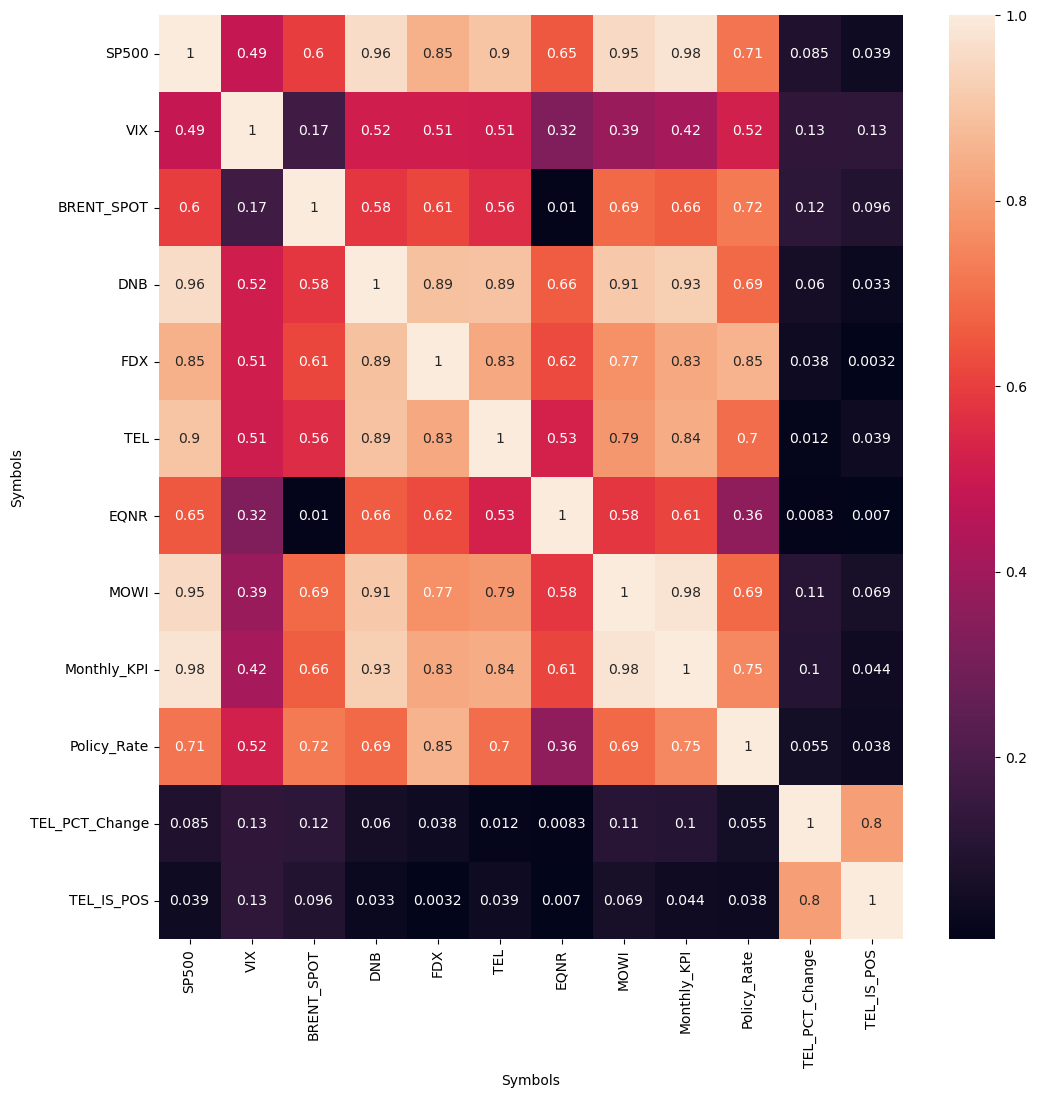

In [32]:
corr_matrix = stock_train.corr()
corr_matrix = abs(corr_matrix)

target_corr_matrix = corr_matrix['TEL'].sort_values(ascending=False)
print(target_corr_matrix)

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)

## 6. Model training and analysis<a class="anchor" id="model-training-and-analysis"></a>

We will start to build our modell with only one independent variabel, "SP500". Reason being, that this variable has the higest correaltion on our dependent variable, "TEL". The reasoning behind only including one independent variabel in our model, is that we want to see if the adjusted R squared increases by extending our modell with one or more independent variabels and if the AIC and BIC reduces by this expansion in our model. 

In [33]:
train_x = stock_train['SP500']
train_y = stock_train['TEL']

In [34]:
# Fit the model
model = sm.OLS(train_y, train_x)
model_est = model.fit()

In [35]:
# Print out the statistics
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)
model_est.summary()

adjusted R squared: 0.9814112302156844
AIC: 1064.6929362117955
BIC: 1067.4969572565287


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TEL   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              6442.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                   8.65e-107
Time:                        16:50:08   Log-Likelihood:                         -531.35
No. Observations:                 122   AIC:                                      1065.
Df Residuals:                     121   BIC:                                      1067.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SP500          0.0663      0.001     80.263      0.000       0.065       0.068
==============================================================================
Omnibus:                       14.380   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.881
Skew:                          -0.772   Prob(JB):                     0.000356
Kurtosis:                       3.861   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By only including "SP500" as our independent variabel in our model, we can see that our model explaines 98,1% of the variation in our dependent variabel, "TEL". The values on the AIC and BIC equals to 1065 and 1067. 

We will now make a updated list of all the independent varaibels in the training set that we can possibly include in our model. Hopfully this wil increase the value on our models adjusted R squared and reduce the values on both AIC and the BIC value.

In [36]:
ind_var_cand = stock_train.columns
ind_var_cand = list(ind_var_cand)

ind_var_cand.remove('TEL')
ind_var_cand.remove('SP500')
print(ind_var_cand)

['VIX', 'BRENT_SPOT', 'DNB', 'FDX', 'EQNR', 'MOWI', 'Monthly_KPI', 'Policy_Rate', 'TEL_PCT_Change', 'TEL_IS_POS']


The following code aims to see wich of the independent variabels in "ind_var_cand" that gives the most significant contribution to further increase our model's adjusted R squared and to further reduce the model's AIC- and BIC values by using forward selection.

In [37]:
my_dict = {}

for candidate in ind_var_cand:
    train_x = stock_train[['SP500', candidate]]
    model = sm.OLS(train_y, train_x)
    model_est = model.fit()
    my_dict[candidate] = model_est.rsquared_adj
my_dict

{'VIX': 0.9859082069839656,
 'BRENT_SPOT': 0.9872616127553896,
 'DNB': 0.9823718227735351,
 'FDX': 0.9822619506958534,
 'EQNR': 0.9859514020531062,
 'MOWI': 0.9917530987790366,
 'Monthly_KPI': 0.9891978951163436,
 'Policy_Rate': 0.9864062199566259,
 'TEL_PCT_Change': 0.9822591441621107,
 'TEL_IS_POS': 0.983415462390086}

As we can see, the variabel 'MOWI' gives the highest adjusted R square on the model, when expanding the model with the independent variabel 'MOWI'. Therfore, we will put "MOWI" in our model to try to better explain the variation in our dependent variabel, "TEL". 

The next step is to then to remove 'MOWI' from our list of independent variabels. This way, we will make a updated list of all the independent varaibles in the training set that we can possibly further include in our model. Hopfully this will again increase the value on our models adjusted R squared and again reduce both AIC and the BIC values.

In [38]:
ind_var_cand.remove('MOWI')

#test our developed modell:
train_x = stock_train[['SP500','MOWI']]
train_y = stock_train['TEL']

model = sm.OLS(train_y, train_x)
model_est = model.fit()
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.9917530987790366
AIC: 966.5286296866203
BIC: 972.1366717760868


As we can see, our model improved significantly when we included "MOWI" togheter with already included, "SP500" as our independent variabels.

We will now repeat the whole process untill the adjusted of the modell starts to decrease/not improve when expanding our model or/and when the AIC and BIC no longer decreases.

In [39]:
my_dict = {}

for candidate in ind_var_cand:
    train_x = stock_train[['SP500', 'MOWI', candidate]]
    model = sm.OLS(train_y, train_x)
    model_est = model.fit()
    my_dict[candidate] = model_est.rsquared_adj 
my_dict

{'VIX': 0.9918232911810315,
 'BRENT_SPOT': 0.9918845408084042,
 'DNB': 0.9921344052026297,
 'FDX': 0.9918734543463638,
 'EQNR': 0.9917417486206991,
 'Monthly_KPI': 0.9920047319001777,
 'Policy_Rate': 0.9916838299960476,
 'TEL_PCT_Change': 0.9919227048968443,
 'TEL_IS_POS': 0.9918832210639412}

In [40]:
ind_var_cand.remove('DNB')

#test our developed modell:
train_x = stock_train[['SP500','MOWI','DNB']]
train_y = stock_train['TEL']

model = sm.OLS(train_y, train_x)
model_est = model.fit()
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.9921344052026297
AIC: 961.7323012215321
BIC: 970.1443643557319


In [41]:
my_dict = {}

for candidate in ind_var_cand:
    train_x = stock_train[['SP500','MOWI','DNB', candidate]]
    model = sm.OLS(train_y, train_x)
    model_est = model.fit()
    my_dict[candidate] = model_est.rsquared_adj
my_dict

{'VIX': 0.9922807042203173,
 'BRENT_SPOT': 0.9922260201593773,
 'FDX': 0.9920872938680385,
 'EQNR': 0.9921636150960732,
 'Monthly_KPI': 0.9924193232911934,
 'Policy_Rate': 0.9920679949401545,
 'TEL_PCT_Change': 0.9922641860067567,
 'TEL_IS_POS': 0.9922664231697549}

In [42]:
ind_var_cand.remove('Monthly_KPI')

#test our developed modell:
train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI']]
train_y = stock_train['TEL']

model = sm.OLS(train_y, train_x)
model_est = model.fit()
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.9924193232911934
AIC: 958.2014852777015
BIC: 969.4175694566345


In [43]:
my_dict = {}

for candidate in ind_var_cand:
    train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', candidate]]
    model = sm.OLS(train_y, train_x)
    model_est = model.fit()
    my_dict[candidate] = model_est.rsquared_adj
my_dict

{'VIX': 0.9923550842717317,
 'BRENT_SPOT': 0.9934383546456564,
 'FDX': 0.9924118809691158,
 'EQNR': 0.9932351695915792,
 'Policy_Rate': 0.9927404530722749,
 'TEL_PCT_Change': 0.9925518763790185,
 'TEL_IS_POS': 0.9924890409676261}

In [44]:
ind_var_cand.remove('BRENT_SPOT')

#test our developed modell:
train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT']]
train_y = stock_train['TEL']

model = sm.OLS(train_y, train_x)
model_est = model.fit()
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.9934383546456564
AIC: 941.5511289487977
BIC: 955.571234172464


In [45]:
my_dict = {}

for candidate in ind_var_cand:
    train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT', candidate]]
    model = sm.OLS(train_y, train_x)
    model_est = model.fit()
    my_dict[candidate] = model_est.rsquared_adj
my_dict

{'VIX': 0.9933851964760464,
 'FDX': 0.9934562262762459,
 'EQNR': 0.9934980394037929,
 'Policy_Rate': 0.9933818185127172,
 'TEL_PCT_Change': 0.9936346248762783,
 'TEL_IS_POS': 0.9935538461956477}

In [46]:
ind_var_cand.remove('EQNR')

#test our developed modell:
train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT','EQNR']]
train_y = stock_train['TEL']

model = sm.OLS(train_y, train_x)
model_est = model.fit()
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.9934980394037929
AIC: 941.3891218328197
BIC: 958.2132481012193


We will include 'EQNR' in our modell since our models adjusted R squared slightly increased by this extension, as well as the value on our model's AIC slightly reduced. In this case, our evaluation is that the slightly increase in our models BIC is insignificant.  

In [47]:
my_dict = {}

for candidate in ind_var_cand:
    train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT','EQNR', candidate]]
    model = sm.OLS(train_y, train_x)
    model_est = model.fit()
    my_dict[candidate] = model_est.rsquared_adj 
my_dict

{'VIX': 0.9934417820084416,
 'FDX': 0.9934529565699614,
 'Policy_Rate': 0.9934515860447444,
 'TEL_PCT_Change': 0.9936967373302596,
 'TEL_IS_POS': 0.9936118543171663}

In [48]:
ind_var_cand.remove('TEL_IS_POS')

#test our developed modell:
train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT','EQNR', 'TEL_IS_POS']]
train_y = stock_train['TEL']

model = sm.OLS(train_y, train_x)
model_est = model.fit()
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.9936118543171663
AIC: 940.1783516293538
BIC: 959.8064989424865


In [49]:
my_dict = {}

for candidate in ind_var_cand:
    train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT','EQNR', "TEL_IS_POS", candidate]]
    model = sm.OLS(train_y, train_x)
    model_est = model.fit()
    my_dict[candidate] = model_est.rsquared_adj 
my_dict

{'VIX': 0.9935578479710861,
 'FDX': 0.9935775669098271,
 'Policy_Rate': 0.9935570010610796,
 'TEL_PCT_Change': 0.9936415771730498}

In [50]:
ind_var_cand.remove('TEL_PCT_Change')

#test our developed modell:
train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT','EQNR', 'TEL_IS_POS', "TEL_PCT_Change"]]
train_y = stock_train['TEL']

model = sm.OLS(train_y, train_x)
model_est = model.fit()
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.9936415771730498
AIC: 940.5438746426819
BIC: 962.976043000548


As we can see, there is no point in including the indipendent variabel: TEL_PCT_Change.
Even though our modells adjusted R squared slightly improves, 
by including this indipendent variabel, the values on the models AIC and the models BIC increases. This indicates that
the modell is being overevalueted by including 'TEL_PCT_Change', wich will weaken our modell.

Through this forward selection, our developed model now consist of the following independent variabels when trying to explain the outcome of our dependent variabel, "TEL_OL:

    - 'SP500'
    - 'MOWI'
    - 'DNB' 
    - 'Monthly_KPI'
    - 'BRENT_SPOT'
    - 'EQNR'
    - 'TEL_IS_POS'

This model has following values on the adjusted R square, AIC and BIC:

In [51]:
train_x = stock_train[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT','EQNR', 'TEL_IS_POS']]
train_y = stock_train['TEL']

model = sm.OLS(train_y, train_x)
model_est = model.fit()
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.9936118543171663
AIC: 940.1783516293538
BIC: 959.8064989424865


Now that we have defined our modell for the OLS linear regression, we want to see how well our defined modell can predict the values on our dependent variable "TEL_OL" in our traing- and test set. in other words; we want to check the performance of our modell.

In [52]:
pred_on_training_y = model_est.predict(train_x)


from sklearn.metrics import mean_squared_error
import numpy as np

MSE = mean_squared_error(train_y, pred_on_training_y)
RMSE = np.sqrt(MSE)

print(RMSE) 

10.771183603389307


In [53]:
X_test = stock_test[['SP500','MOWI','DNB', 'Monthly_KPI', 'BRENT_SPOT','EQNR', 'TEL_IS_POS']]
y_test = stock_test['TEL']

pred_y = model_est.predict(X_test)
MSE = mean_squared_error(y_test, pred_y)
RMSE = np.sqrt(MSE)

print(RMSE) 

105.07968804894134


Here we see that the RMSE of the training data is smaller than the RMSE of the test data. This is an indicator that we have overfitted our model.

To better undestand the reasons behind the overfitting and high r-value of our model we will analyse the multicollinearity by executing a VIF-test on the independent variables.

In [54]:
# the independent variables set
X = stocksmonthly.drop(["TEL", "TEL_PCT_Change"], axis=1)

In [55]:
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature         VIF
0        SP500  143.738070
1          VIX   16.361962
2   BRENT_SPOT   43.170213
3          DNB  241.381596
4          FDX   73.188004
5         EQNR   44.916257
6         MOWI   72.475905
7  Monthly_KPI  137.653444
8  Policy_Rate   23.965299
9   TEL_IS_POS    2.179846


In [56]:
# Remove the price from the dataset
Y = stocksmonthly["TEL"]
iv = X.columns
X = X[iv]
 
# calculate the variance inflation factor
# compare with each column
[vif(X[iv].values, index) for index in range(len(iv))]
 
# Removing multicollinearity from the dataset using vif
# compare with each columns
for i in range(len(iv)):
    vif_list = [vif(X[iv].values, index) for index in range(len(iv))]
    maxvif = max(vif_list)
    print("Max VIF value is ", maxvif)                     
    drop_index = vif_list.index(maxvif)
    print("For Independent variable", iv[drop_index])
    
    if maxvif > 2:
        
        print("Deleting", iv[drop_index])
        iv = iv.delete(drop_index)
        print("Final Independent_variables ", iv)

Max VIF value is  241.38159604484272
For Independent variable DNB
Deleting DNB
Final Independent_variables  Index(['SP500', 'VIX', 'BRENT_SPOT', 'FDX', 'EQNR', 'MOWI', 'Monthly_KPI',
       'Policy_Rate', 'TEL_IS_POS'],
      dtype='object', name='Symbols')
Max VIF value is  135.03093282641987
For Independent variable Monthly_KPI
Deleting Monthly_KPI
Final Independent_variables  Index(['SP500', 'VIX', 'BRENT_SPOT', 'FDX', 'EQNR', 'MOWI', 'Policy_Rate',
       'TEL_IS_POS'],
      dtype='object', name='Symbols')
Max VIF value is  106.344185023277
For Independent variable SP500
Deleting SP500
Final Independent_variables  Index(['VIX', 'BRENT_SPOT', 'FDX', 'EQNR', 'MOWI', 'Policy_Rate',
       'TEL_IS_POS'],
      dtype='object', name='Symbols')
Max VIF value is  42.27069219429674
For Independent variable EQNR
Deleting EQNR
Final Independent_variables  Index(['VIX', 'BRENT_SPOT', 'FDX', 'MOWI', 'Policy_Rate', 'TEL_IS_POS'], dtype='object', name='Symbols')
Max VIF value is  21.957260611647

In [57]:
print("The independent variables with the lowest VIF-value are" ,iv[0],",", iv[1], "and", iv[2])

The independent variables with the lowest VIF-value are MOWI , Policy_Rate and TEL_IS_POS


The VIF-test provides a value where if VIF=1 there is no multicollinarity, and even though the there is diverging opinion on excactly where the limit between insignificant and significant multicollinarity occurs, there is some consesus that between 1 and 5 shows some, but insignificant, and above 10 shows a high degree of multicollinarity. As can be seen in the above test, the degree of multicollinarity is very high for most of our values except VIX, MOWI and TEL_IS_POS.

VIF-value method retrieved from https://www.geeksforgeeks.org/multicollinearity-in-data/

Next we will try the same variables on a logistic regression on a boolean value. We do this by adding a column with the next months value in the same row as todays stock prices, then use this as the output value in order to train our model to predict.

In [58]:
stocksmonthly["TEL_IS_POS_T1"] = stocksmonthly["TEL_IS_POS"].shift(periods=-1)

In [59]:
#Filling the last value as NaN is not accepted by the model
stocksmonthly.TEL_IS_POS_T1 = stocksmonthly["TEL_IS_POS_T1"].ffill()

In [60]:
#Choosing the same values as we used in the logistic regression in order to compare.
stocks_log = stocksmonthly[["SP500","MOWI", "BRENT_SPOT", "DNB", "TEL_IS_POS", "EQNR", "Monthly_KPI", "TEL_IS_POS_T1"]]

In [61]:
x = stocks_log.drop(["TEL_IS_POS_T1"], axis=1).values

y = stocks_log["TEL_IS_POS_T1"].values

In [62]:
#Number of months to test our model on
test_months = 18

In [63]:
#Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_months, shuffle=False)

In [64]:
#Using a scaler to scale the data, important to only scale the x value as well as fitting the scaler on the train set and then transforming the test set
sc_x = MinMaxScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)

In [65]:
#Initializing and fitting the model 
log_model = LogisticRegression()
log_model.fit(xtrain, y_train)
print(log_model.coef_)
print(log_model.intercept_)

[[-0.16406988 -0.20853748  0.284679   -0.12547772  0.09352483 -0.12826386
   0.25815545]]
[0.11823577]


In [66]:
#Predict on y using x_test
y_pred = log_model.predict(xtest)

In [67]:
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[11  2]
 [ 4  1]]


In [68]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6666666666666666


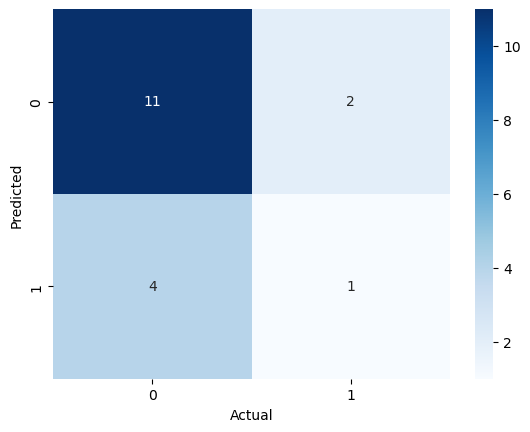

In [69]:
sns.heatmap(cm, annot = True, cmap='Blues' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The logistic regression model predicts negative change in the Telenor stock for the next month in 15 instances while being correct 11 times. It predicts an increase three times, when it only occured five times. This gives a model accuracy of 66.67%.

## 7. Conclusion <a class="anchor" id="conclusion"></a>

In this mandatory assignment we have tried to predict Telenor's stock price based on a fundamental analysis. We have used makro-economic factors such as the policy rate and the volatility index, as well as stock prices on other significant corporations. We started of by implementing these factors in a data frame. Then we visualized the data using different charts, histograms and boxplots to better understand our data. To see how the stocks and makro-economic factors had changed over time. 
Then we showed basic and simple statistics to further understand our data before we started to prepare our data for regressions, data modelling and analysis. To build our prediction model we used the method of "forward selection". We included all variables that gave us a stronger adjusted-R and lowered our AIC- and BIC values. From our initially collected variables we ended up excluding the variables VIX, FDX, Policy_rate, TEL_PCT_Change. That means that we are left with SP500, MOWI, Brent_SPOT, DNB, EQNR, Monthly_KPI and TEL_is_POS in our model to predict Telenor's stock price. 
Then we use a linear regression model and split our data into a test and training set and then looked at the RMSE of each of our datasets. From the RSME of the datasets we can clearly see that our model has too high of a RSME. Furthermore, we can see that the RSME of the training data is smaller than the test data, which indicates that we have overfitted our model.
To better understand the problems with our model we ran a VIF-test. From this test we can clearly see that most of our variables have a very high degree of multicollinearity, with only MOWI, Policy_Rate and TEL_IS_POS having acceptable VIF_values.
In short, the linear regression model is not capable of accurately predicting Telenor's stock price.

From the results of our linear regression model, we see that it has an adjusted R squared of 0.9936, which should mean that we could predict Telenor's stock price almost every time. This is however not the case. There are several reasons why our adjusted R squared is higher than it should be. Firstly, our model has a lot of multicollinearities. Meaning that there seems to be one or more lurking variables that affect several of the independent variables. Secondly, linear regression assumes straight line relationships between the dependent and independent variables. Since this most likely is not the case, the linear regression model will show misleading results.

Lastly, we have executed a logistic regression model with the same independent variables as we used in the linear regression model. We have on the other hand changed our dependent variable to TEL_is_POS. We did this because we need to have a binary dependent variable as the dependent variable. This also simplifies our prediction to whether the stock price goes up or down instead of predicting the exact value of the stock price. We got an accuracy of 66.6%. It seems that our model has a bias towards predicting negative stock change. That may be because of historical data which shows a negative trend. 

As we said in our introduction, it is quite ambitious to try and predict stock prices. This is clearly shown in our assignment seeing that we are far of. At the same time our logistic regression is managing to predict decrease or increase in stock price one month ahead, but from our testing this may be coincidental because of lack of data.


## 8. References <a class="anchor" id="references"></a>

SSB \
Norges Bank \
Yahoo

## 9. Word Count <a class="anchor" id="word-count"></a>

In [70]:
import json

with open('Arbeidskrav.ipynb') as json_file:
    data = json.load(json_file)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] 
            wordCount = wordCount + len(temp)
            
print("We have", wordCount, "words excluding coding blocks.")

We have 4120 words excluding coding blocks.
